## CV demo


### Imports

In [69]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-01-28 19:12:41.738188: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-28 19:12:43.339260: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-28 19:12:45.576434: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
import data.data_utils

# cross-validation classes
from data.cv_split import (
    RandomCVSplit, 
    SchaeferCVSplit, 
    CommunityCVSplit, 
    SubnetworkCVSplit, 
    SpatialCVSplit
)

import data.cv_split
from data.data_load import load_transcriptome, load_connectome, load_coords


In [20]:
X = load_transcriptome(parcellation='S100', hemisphere='both')
Y = load_connectome(parcellation='S100', hemisphere='both')
coords = load_coords(parcellation='S100', hemisphere='both')

In [23]:
'''
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 42]

for s in seeds:
    print('seed', s)
    spatial_obj = SpatialCVSplit(X, Y, coords, num_splits=1, random_seed=s, train_size=0.75)
'''
spatial_obj = SpatialCVSplit(X, Y, coords, num_splits=10, random_seed=2)
print(spatial_obj.networks)
spatial_obj.display_splits()

Network coverage: 100.0% of regions
Network sizes: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
{'1': [40, 33, 17, 6, 23, 39, 18, 7, 35, 16], '2': [20, 19, 14, 28, 13, 49, 70, 88, 65, 76], '3': [92, 58, 90, 73, 60, 59, 74, 50, 52, 91], '4': [34, 26, 42, 25, 21, 46, 41, 47, 45, 44], '5': [79, 93, 75, 94, 78, 30, 83, 71, 82, 95], '6': [36, 86, 99, 48, 98, 10, 77, 29, 22, 55], '7': [24, 37, 11, 9, 31, 38, 0, 32, 12, 15], '8': [51, 54, 53, 56, 66, 5, 4, 2, 57, 89], '9': [63, 62, 64, 67, 72, 68, 80, 61, 85, 81], '10': [8, 3, 1, 69, 27, 87, 97, 96, 43, 84]}
Fold 1:
TRAIN: [20 19 14 28 13 49 70 88 65 76 92 58 90 73 60 59 74 50 52 91 34 26 42 25
 21 46 41 47 45 44 79 93 75 94 78 30 83 71 82 95 36 86 99 48 98 10 77 29
 22 55 24 37 11  9 31 38  0 32 12 15 51 54 53 56 66  5  4  2 57 89 63 62
 64 67 72 68 80 61 85 81  8  3  1 69 27 87 97 96 43 84]
TEST: [40 33 17  6 23 39 18  7 35 16]

Fold 2:
TRAIN: [40 33 17  6 23 39 18  7 35 16 92 58 90 73 60 59 74 50 52 91 34 26 42 25
 21 46 41 47 45 44 79 93 75 9

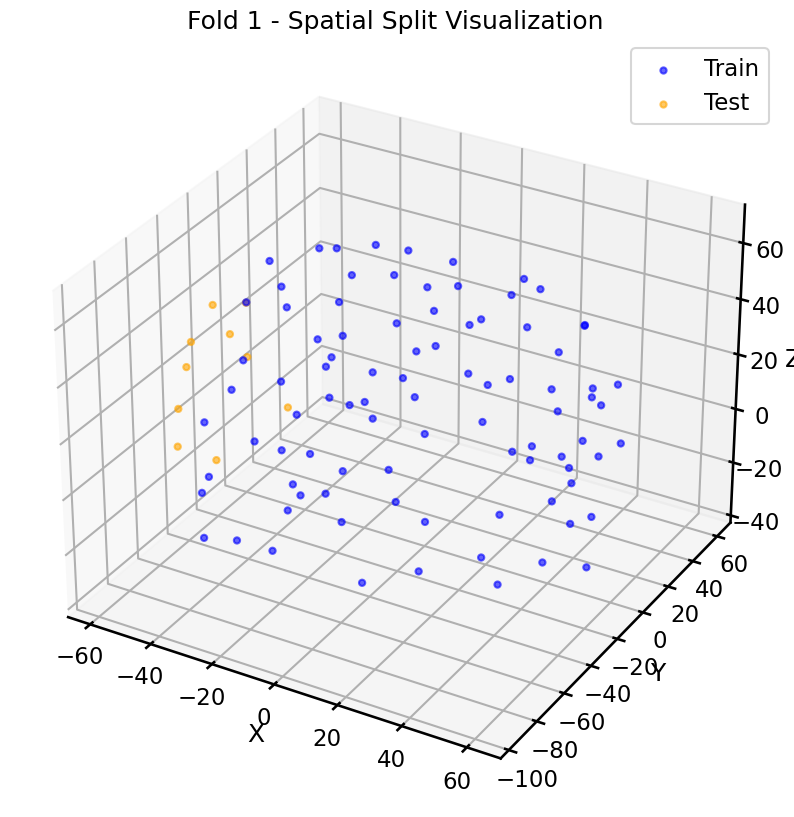

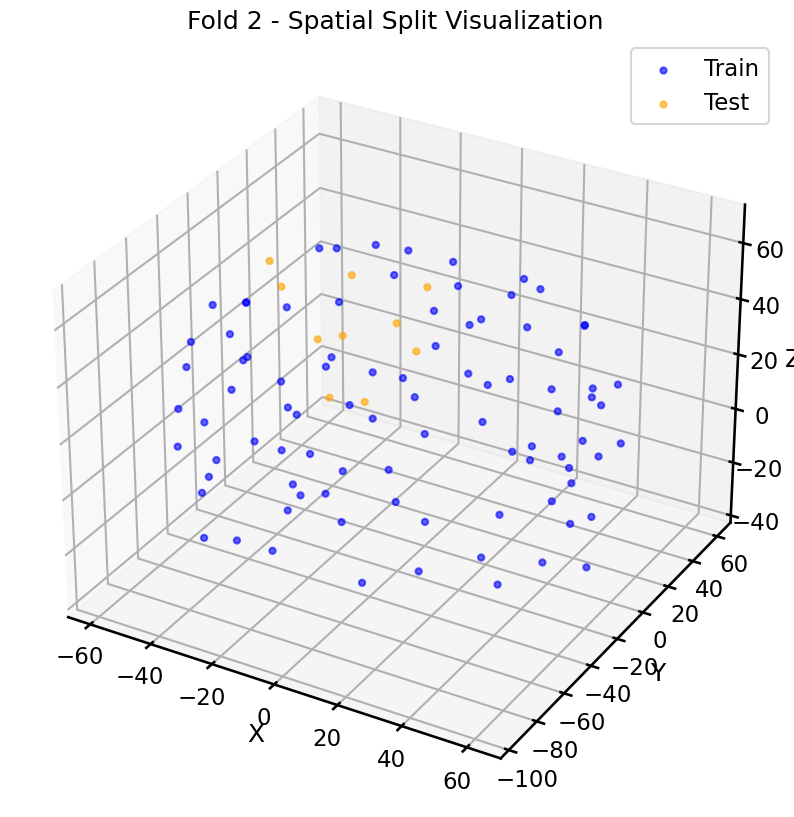

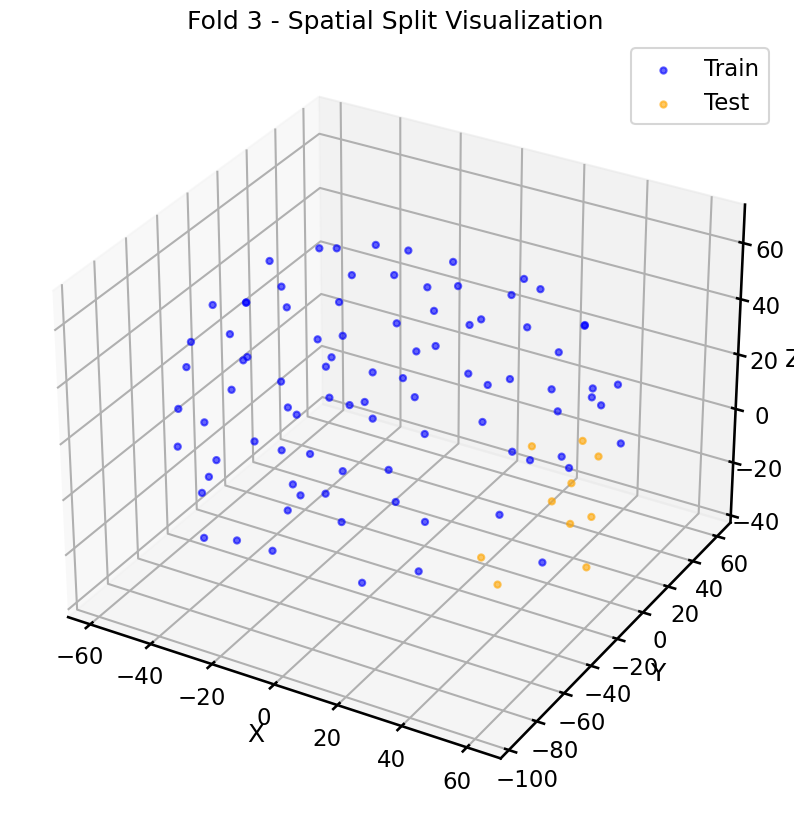

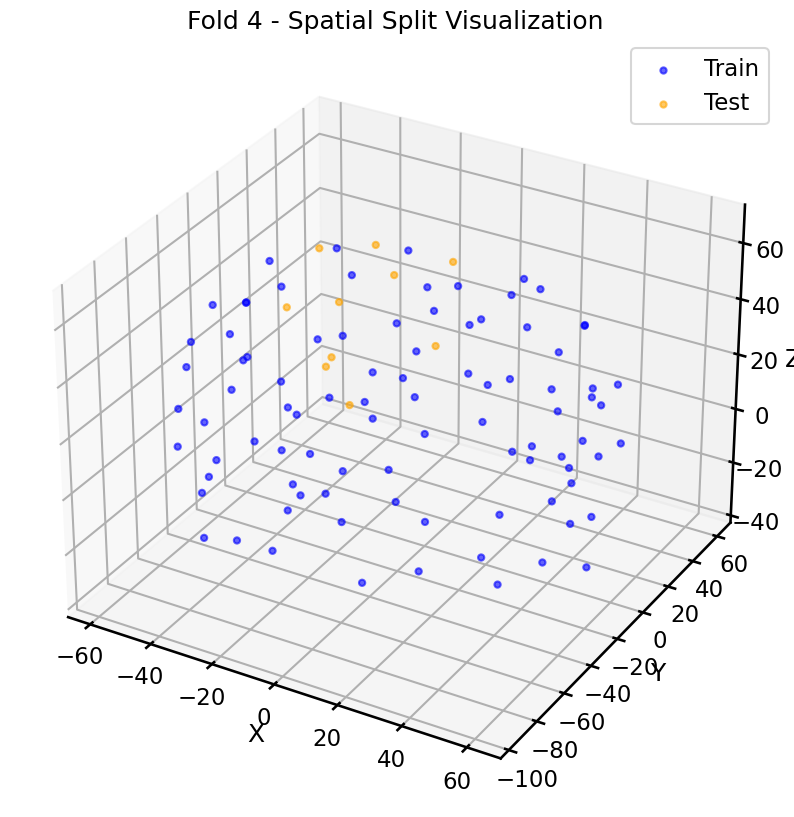

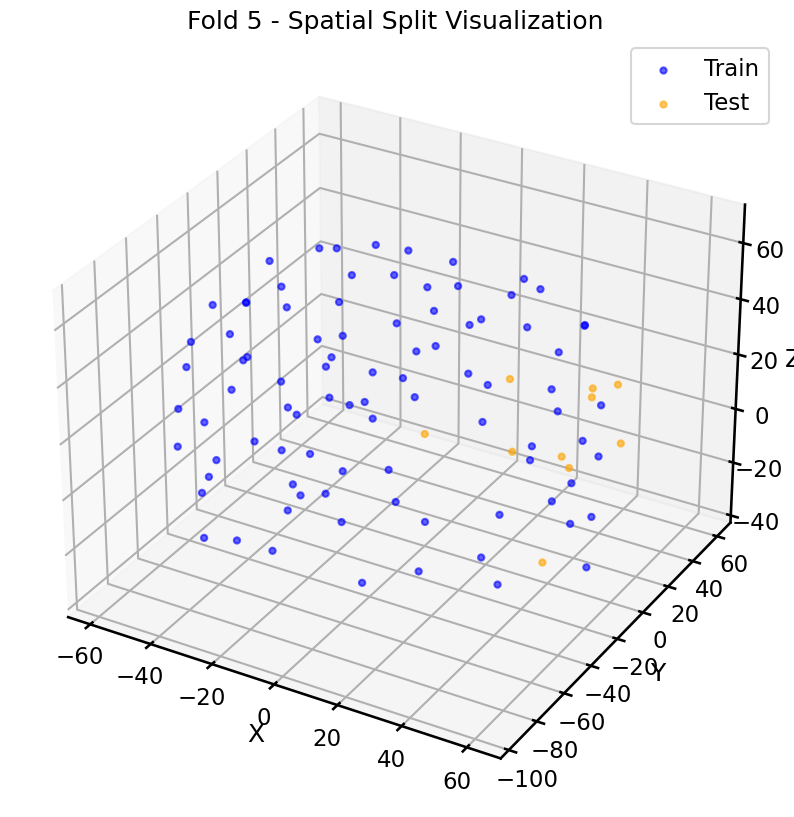

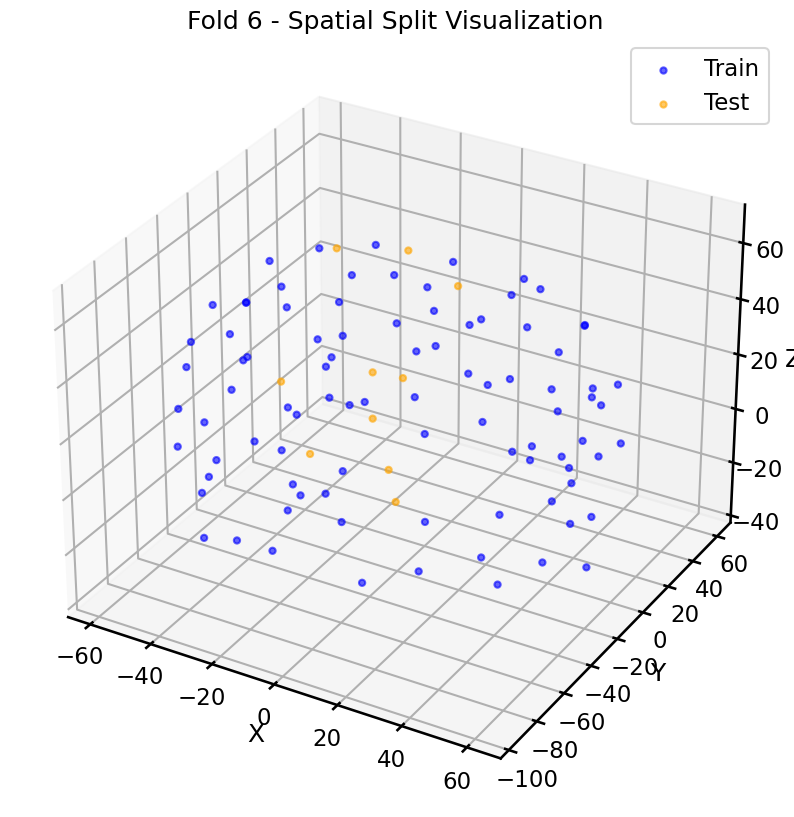

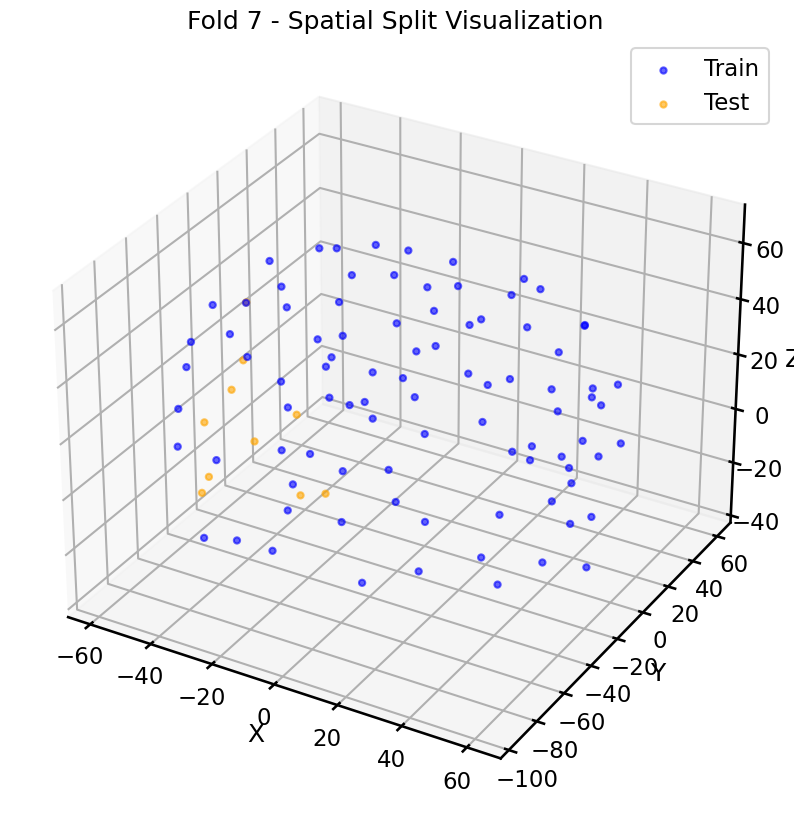

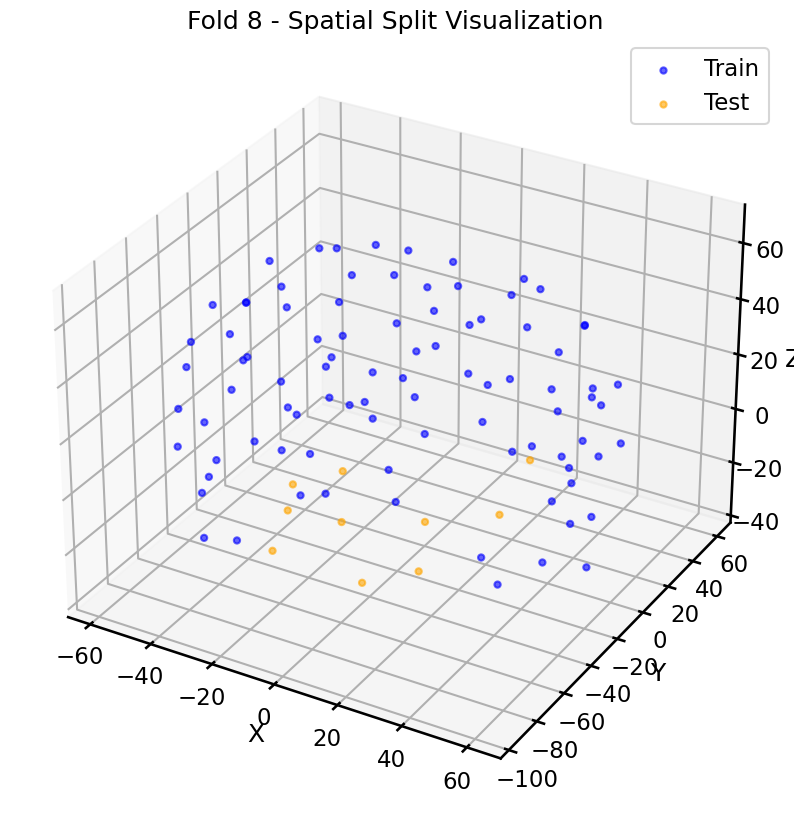

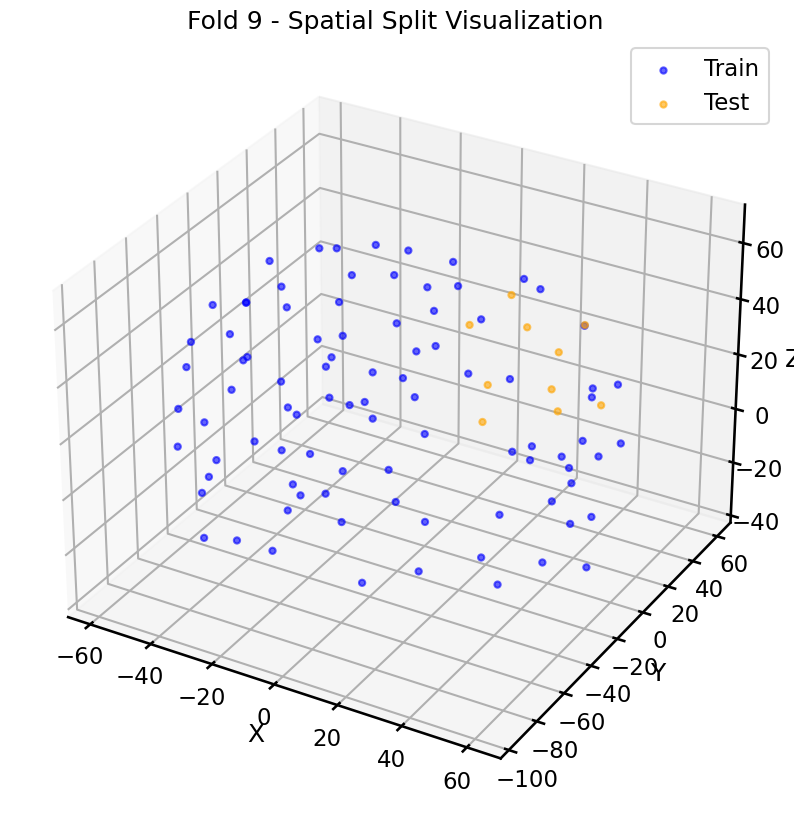

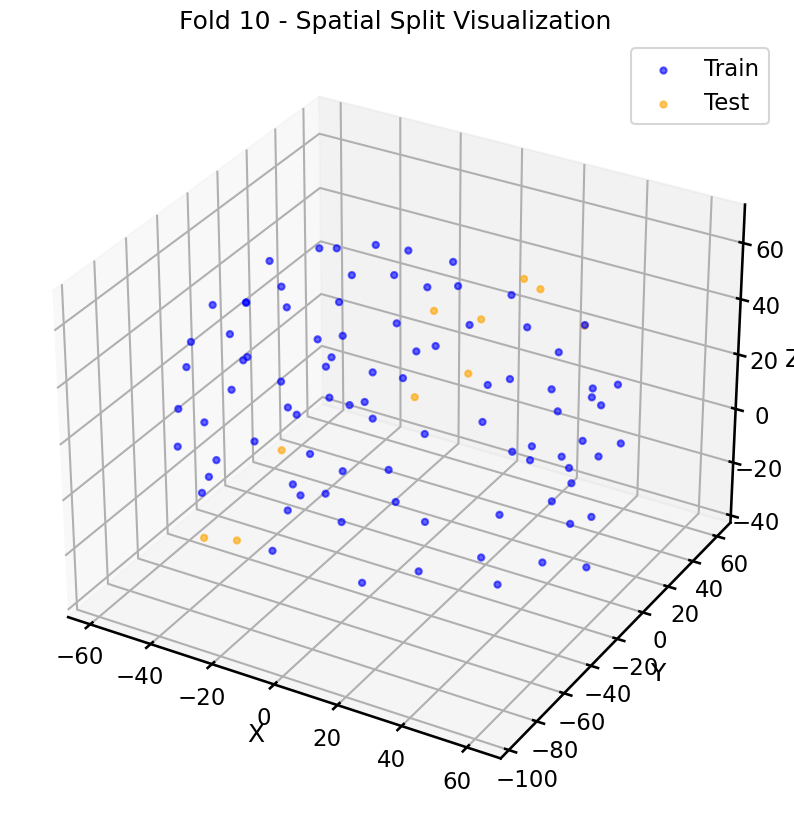

In [24]:
spatial_obj.visualize_splits_3d()

In [17]:
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 42]

for s in seeds:
    print('seed', s)
    random_obj = RandomCVSplit(X, Y, num_splits=4, shuffled=True, use_random_state=True, random_seed=s)
    print(random_obj.networks)

seed 1
{'1': array([ 2, 10, 17, 19, 31, 32, 33, 36, 39, 44, 51, 52, 56, 62, 65, 69, 73,
       78, 80, 81, 82, 84, 92, 93, 97]), '2': array([15, 23, 26, 27, 34, 35, 38, 40, 41, 45, 46, 48, 53, 54, 59, 67, 77,
       83, 86, 88, 91, 94, 95, 98, 99]), '3': array([ 0,  3,  4,  7,  8, 21, 22, 24, 30, 42, 43, 47, 49, 55, 57, 58, 60,
       61, 63, 66, 70, 74, 87, 89, 90]), '4': array([ 1,  5,  6,  9, 11, 12, 13, 14, 16, 18, 20, 25, 28, 29, 37, 50, 64,
       68, 71, 72, 75, 76, 79, 85, 96])}
seed 2
{'1': array([ 0,  2,  3, 11, 13, 14, 16, 21, 23, 24, 27, 28, 29, 30, 35, 44, 56,
       61, 73, 76, 79, 83, 84, 92, 99]), '2': array([ 1,  5,  6, 10, 12, 18, 19, 25, 26, 32, 36, 48, 53, 54, 55, 60, 62,
       65, 74, 77, 78, 87, 89, 91, 95]), '3': array([ 8,  9, 17, 41, 45, 46, 50, 52, 57, 59, 64, 66, 68, 69, 70, 71, 80,
       81, 86, 88, 90, 94, 96, 97, 98]), '4': array([ 4,  7, 15, 20, 22, 31, 33, 34, 37, 38, 39, 40, 42, 43, 47, 49, 51,
       58, 63, 67, 72, 75, 82, 85, 93])}
seed 3
{'1': arr

In [5]:
resolutions = [1.01]
seeds = [1, 2, 4, 5, 42]

for r in resolutions:
    for s in seeds:
        print('resolution', r, 'seed', s)
        community_obj = CommunityCVSplit(X, Y, resolution=r, random_seed=s)
        print(community_obj.networks)

resolution 1.01 seed 1
{'1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 20, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 101, 108], '2': [66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 15, 16, 17, 80, 19, 84, 21, 22, 23, 24, 25, 26, 27, 28, 29, 87, 33, 83, 34, 39], '3': [0, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 78, 79, 81, 82, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113]}
resolution 1.01 seed 2
{'1': [1, 2, 66, 4, 5, 6, 69, 8, 7, 3, 15, 17, 51, 52, 53, 54, 55, 56, 57], '2': [0, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 78, 79, 81, 82, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113], '3': [64, 65, 67, 9, 10, 11, 12, 13, 14, 18, 20, 101, 108, 58, 59, 60, 61, 62, 63], '4': [68, 70, 71, 72, 73, 74, 75, 76, 77, 16, 80, 19, 83, 21, 22, 23, 24, 25, 26, 27, 28, 29, 87, 

In [8]:
schaefer_obj = SchaeferCVSplit()
print(schaefer_obj.networks)

Vis
Vis
SomMot
SomMot
DorsAttn
DorsAttn
SalVentAttn
SalVentAttn
Limbic
Limbic
Cont
Cont
Default
Default
Subcortical
Subcortical
{'Vis': [0, 1, 2, 3, 4, 5, 6, 7, 8, 50, 51, 52, 53, 54, 55, 56, 57], 'SomMot': [9, 10, 11, 12, 13, 14, 58, 59, 60, 61, 62, 63, 64, 65], 'DorsAttn': [15, 16, 17, 18, 19, 20, 21, 22, 66, 67, 68, 69, 70, 71, 72], 'SalVentAttn': [23, 24, 25, 26, 27, 28, 29, 73, 74, 75, 76, 77], 'Limbic': [30, 31, 32, 78, 79], 'Cont': [33, 34, 35, 36, 80, 81, 82, 83, 84, 85, 86, 87, 88], 'Default': [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'Subcortical': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]}
